In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import YearLocator, DateFormatter
from arch import arch_model

In [35]:
def rv_calc(log_returns, h):
    
    """
    Calculates the realized volatility at each point in time after the time window h is surpassed. Balancing h is essential,
    more h is a more accurate description, but volatility changes over time, which means window must not get too big

    Arguments:
    log_returns -- 1D array of log_returns
    h -- integer that specifies the window size for volatilty estimation
    """
    
    rv = np.zeros(len(log_returns)-(h-1))

    for i in range(len(log_returns)-(h-1)):
        rv[i] = np.var(log_returns[i:(h+i)])  
    rv = np.sqrt(rv)
    return rv

# 1. Electricity prices

In [27]:
data = pd.read_csv('european_wholesale_electricity_price_data_hourly.csv')
data_Spain = data[data['Country']=='Spain']
dates = pd.to_datetime(data_Spain['Datetime (Local)'])
prices = data_Spain['Price (EUR/MWhe)']
epsilon = 1e-8
prices[prices<=0] = epsilon #Cleaning out prices equal or lower than 0

/var/folders/f4/r997w8nx5v5022dy1nxllgk00000gn/T/ipykernel_42438/2909684575.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prices[prices<=0] = epsilon #Cleaning out prices equal or lower than 0
/var/folders/f4/r997w8nx5v5022dy1nxllgk00000gn/T/ipykernel_42438/2909684575.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prices[prices<=0] = epsilon #Cleaning out prices equal or lower than 0


In [16]:
df = pd.DataFrame(dates[(len(dates)-20000):len(dates)])

df.to_csv('dates.csv', index = False)

In [28]:
prices = prices.values

In [30]:
prices = pd.DataFrame(prices)

In [31]:
log_returns = np.log(prices/prices.shift(1))
log_returns = log_returns[1:]
log_returns.to_csv('log_returns.csv')

In [ ]:
## Export log-returns france

In [65]:
log_returns_france = pd.read_csv('log_returns_france.csv')

In [67]:
log_returns_france = log_returns_france.values

In [68]:
log_returns_france[log_returns_france>5]=5
log_returns_france[log_returns_france<-5]=-5

In [70]:
# Prices
df = pd.DataFrame(log_returns_france)

# write the DataFrame to a CSV file
df.to_csv('log_returns_france.csv', index=False)

In [20]:
rv = rv_calc(log_returns, 50)

In [22]:
print(rv)

[0.08151811 0.08166263 0.08037099 ... 0.11403197 0.11419576 0.11200127]


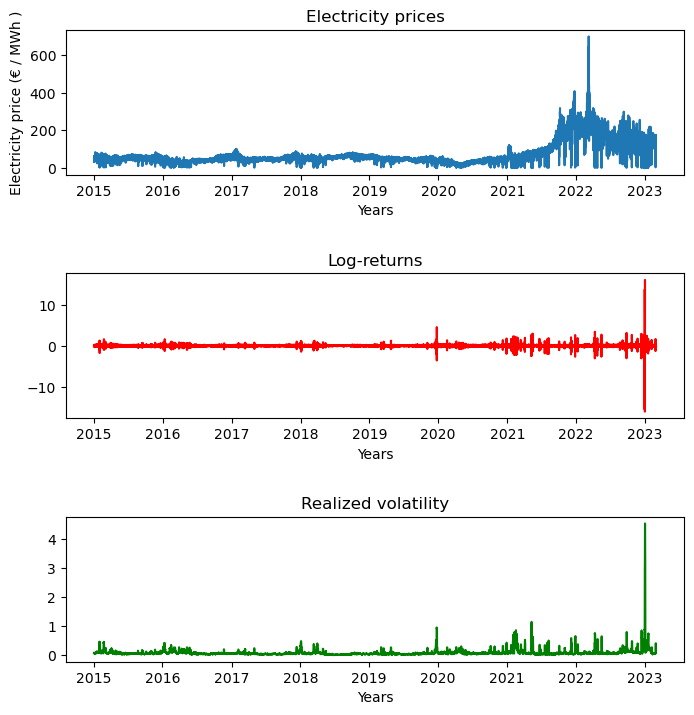

In [25]:
fig, axs = plt.subplots(3, figsize=(8, 8))
fig.tight_layout(pad=5.0)
axs[0].set(xlabel='Years', ylabel='Electricity price (€ / MWh )')
axs[0].set_title("Electricity prices")
axs[0].plot(dates, prices)
axs[1].set(xlabel='Years', ylabel='')
axs[1].set_title("Log-returns")
axs[1].plot(dates[1:], log_returns, color = 'r')
axs[2].set(xlabel='Years', ylabel='')
axs[2].set_title("Realized volatility")
axs[2].plot(dates[50:], rv, color = 'g')

In [73]:
# Log returns
df = pd.DataFrame(log_returns)

# write the DataFrame to a CSV file
df.to_csv('log_returns_spain.csv', index=False)

# Prices
df = pd.DataFrame(prices)

# write the DataFrame to a CSV file
df.to_csv('prices_spain.csv', index=False)

## 1.2 Data checks

In [44]:
## 2. Data exploration

#log_returns = pd.read_csv('log_returns_spain_2.csv')

### 2.1 Stationarity 

from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from statsmodels.tsa.stattools import kpss
import seaborn as sns

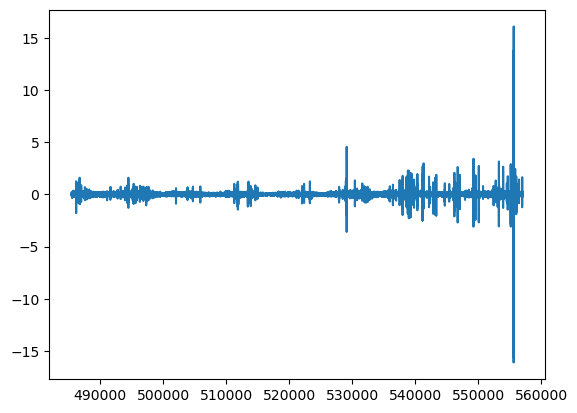

In [45]:
plt.plot(log_returns)

In [46]:
#ADF test
result = adfuller(log_returns)
print(result)

#KPSS test
# perform the KPSS test on the time series
kpss_stat, p_value, lags, critical_values = kpss(log_returns)

# print the test results
print(f"KPSS Statistic: {kpss_stat}")
print(f"P-value: {p_value}")
print(f"Lags used: {lags}")
print("Critical Values:")
for key, value in critical_values.items():
    print(f"   {key}: {value}")

# interpret the test results
if p_value < 0.05:
    print("The time series is not stationary (reject the null hypothesis of stationarity).")
else:
    print("The time series is stationary (fail to reject the null hypothesis of stationarity).")

(-47.59223043525792, 0.0, 62, 71480, {'1%': -3.430441487616822, '5%': -2.8615804359155175, '10%': -2.566791522653857}, -58653.773514149536)
KPSS Statistic: 0.0042457194739356895
P-value: 0.1
Lags used: 260
Critical Values:
   10%: 0.347
   5%: 0.463
   2.5%: 0.574
   1%: 0.739
The time series is stationary (fail to reject the null hypothesis of stationarity).


/Users/thomasvollebregt/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


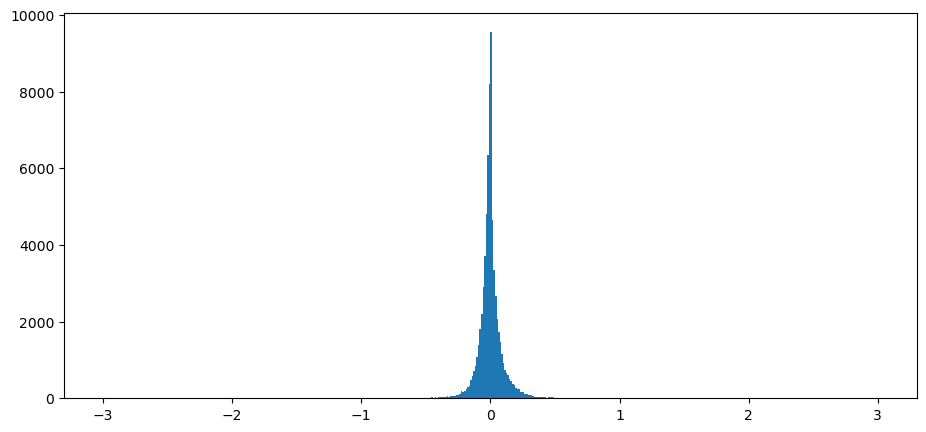

In [39]:
plot = plt.hist(log_returns, bins = 500)
plt.plot()

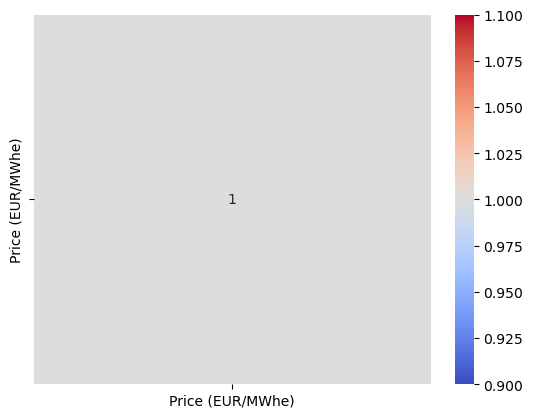

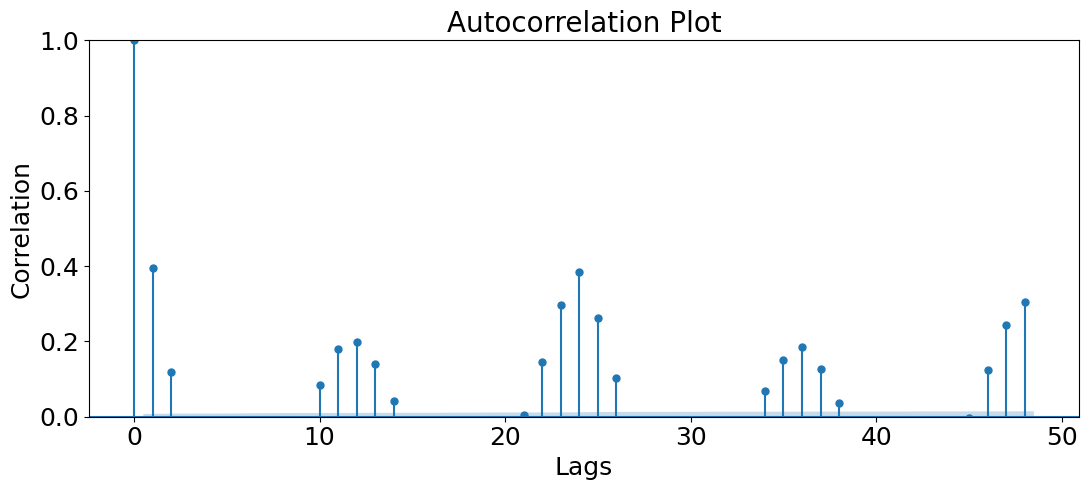

In [35]:
### 2.2 Correlation

# Create a correlation matrix
corr = log_returns.corr()

# Create a heatmap of the correlation matrix
sns.heatmap(corr, annot=True, cmap='coolwarm')

# Plot autocorrelation
from statsmodels.graphics.tsaplots import plot_acf

plt.rc("figure", figsize=(11,5))
plot_acf(log_returns, lags=48)
plt.ylim(0,1)
plt.xlabel('Lags', fontsize=18)
plt.ylabel('Correlation', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('Autocorrelation Plot', fontsize=20)
plt.tight_layout()
plt.show()

## QQ Plots

In [108]:
# Generate some sample log returns data
log_returns = log_returns.values.tolist()

# Sort the log returns data in ascending order
log_returns.sort()

In [113]:
log_returns = np.array(log_returns)

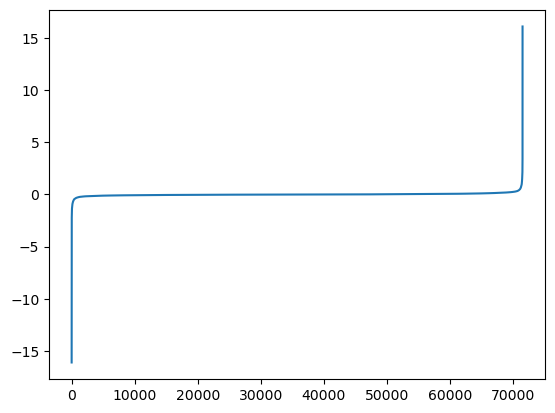

In [110]:
plt.plot(log_returns)

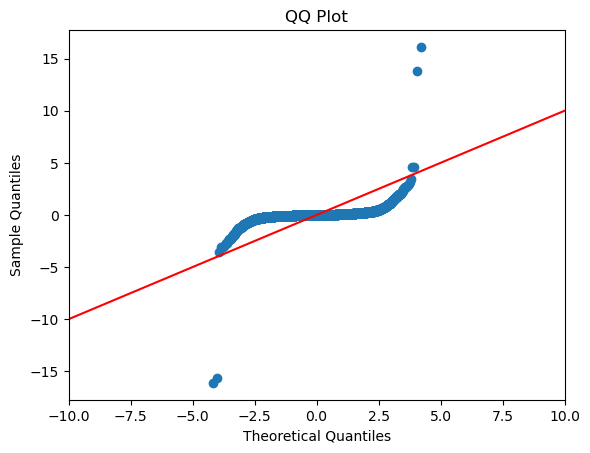

In [116]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# generate a sample dataset
data = log_returns

# create a ProbPlot object
qq = sm.ProbPlot(data)

# create a figure and axis object
fig, ax = plt.subplots()

# plot the QQ plot with a line instead of dots
qq.qqplot(ax=ax, line='45')

# set axis labels and title
ax.set_xlabel('Theoretical Quantiles')
ax.set_ylabel('Sample Quantiles')
ax.set_title('QQ Plot')

plt.xlim(-10, 10)

# display the plot
plt.show()

# 2. Commodities

In [3]:
# Picked data sets
crude_oil_data = pd.read_excel('Commodities/Crude_oil_data.xlsx') #High
brent_oil_data = pd.read_excel('Commodities/Brent_oil_data.xlsx') #High
corn_data = pd.read_excel('Commodities/Corn_data.xlsx')        #Low
soy_data = pd.read_excel('Commodities/Soybean_data.xlsx')      #Low

In [205]:
# Other, can be evaluated later
heating_oil_data = pd.read_excel('Commodities/Heating_oil_data.xlsx') #High
wheat_data = pd.read_excel('Commodities/Wheat_data.xlsx')
copper_data = pd.read_excel('Commodities/Copper_data.xlsx')
gas_data = pd.read_excel('Commodities/Gas_data.xlsx')          #High
carbon_data = pd.read_excel('Commodities/Carbon_data.xlsx')    #High
gold_data = pd.read_excel('Commodities/Gold_data.xlsx')

In [4]:
# Flip the sequence
crude_oil_prices = crude_oil_data['Price'][::-1]
brent_oil_prices = brent_oil_data['Price'][::-1]
corn_data_prices = corn_data['Price'][::-1]
soy_data_prices = soy_data['Price'][::-1]

In [5]:
# Remove index
crude_oil_prices = crude_oil_prices.reset_index(drop=True)
brent_oil_prices = brent_oil_prices.reset_index(drop=True)
corn_prices = corn_data_prices.reset_index(drop=True)
soy_prices = soy_data_prices.reset_index(drop=True)

In [7]:
# Apply log-differencing to all sequences
log_returns_crude = np.log(crude_oil_prices/crude_oil_prices.shift(1))
log_returns_brent = np.log(brent_oil_prices/brent_oil_prices.shift(1))
log_returns_corn = np.log(corn_prices/corn_prices.shift(1))
log_returns_soy = np.log(soy_prices/soy_prices.shift(1))

In [9]:
print('Sequences used: High')
print(np.var(log_returns_crude))
print(np.var(log_returns_brent))
print('Sequences used: Low')
print(np.var(log_returns_corn))
print(np.var(log_returns_soy))

Sequences used: High
0.0006577874382722338
0.000543610787008253
Sequences used: Low
0.0002656145306877403
0.0002265169900861007
Other


NameError: name 'log_returns_silver' is not defined

## 2.1 Exporting log-returns commodities

In [11]:
log_returns_brent.to_csv('/Users/thomasvollebregt/Dropbox/My Mac (thomasvollebregt’s MacBook Pro)/Documents/VU/Master/Scriptie/Programming/Volatility Modelling/4. GARCH modelling/3_Commodities/Datasets_commodities/Logreturns_brent.csv', index=False)
log_returns_crude.to_csv('/Users/thomasvollebregt/Dropbox/My Mac (thomasvollebregt’s MacBook Pro)/Documents/VU/Master/Scriptie/Programming/Volatility Modelling/4. GARCH modelling/3_Commodities/Datasets_commodities/Logreturns_crude.csv', index=False)
log_returns_corn.to_csv('/Users/thomasvollebregt/Dropbox/My Mac (thomasvollebregt’s MacBook Pro)/Documents/VU/Master/Scriptie/Programming/Volatility Modelling/4. GARCH modelling/3_Commodities/Datasets_commodities/Logreturns_corn.csv', index=False)
log_returns_soy.to_csv('/Users/thomasvollebregt/Dropbox/My Mac (thomasvollebregt’s MacBook Pro)/Documents/VU/Master/Scriptie/Programming/Volatility Modelling/4. GARCH modelling/3_Commodities/Datasets_commodities/Logreturns_soy.csv', index=False)